In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [4]:
# Using Iterative Imputer impute the missing data in all columns
def impute_iterartive_imputer(train_data, test_data):
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(imputation_order='ascending')
    imp.fit(train_data)
    train_trans=imp.transform(train_data)
    test_trans=imp.transform(test_data)
    return train_trans, test_trans

In [5]:
# Using Simple Imputer with strategy "Mean"
def impute_mean_imputer(train_data, test_data):
    from sklearn.impute import SimpleImputer
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp_mean.fit(train_copy)
    train_trans=imp_mean.transform(train_data)
    test_trans=imp_mean.transform(test_data)
    return train_trans,test_trans

In [6]:
# Using Simple Imputer with strategy "Most Frequent"
def impute_most_frequent_imputer(train_data, test_data):
    from sklearn.impute import SimpleImputer
    imp_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    imp_mf.fit(train_copy)
    train_trans=imp_mf.transform(train_data)
    test_trans=imp_mf.transform(test_data)
    return train_trans,test_trans

In [7]:
# Read the data from file
df = pd.read_csv("WeatherData.csv")
print(df.head)

<bound method NDFrame.head of        station_id  longitude   latitude                  time  \
0              M1 -11.200000  53.126600  2001-02-06T13:00:00Z   
1              M1 -11.200000  53.126600  2001-02-06T14:00:00Z   
2              M1 -11.200000  53.126600  2001-02-06T15:00:00Z   
3              M1 -11.200000  53.126600  2001-02-06T16:00:00Z   
4              M1 -11.200000  53.126600  2001-02-06T18:00:00Z   
...           ...        ...        ...                   ...   
711672         M2  -5.430200  53.483600  2020-11-08T17:00:00Z   
711673         M6 -15.881350  53.074820  2020-11-08T17:00:00Z   
711674         M5  -6.704336  51.690425  2020-11-08T17:00:00Z   
711675         M4  -9.999136  54.999967  2020-11-08T17:00:00Z   
711676         M3 -10.548261  51.215956  2020-11-08T17:00:00Z   

        AtmosphericPressure  WindDirection  WindSpeed    Gust  WaveHeight  \
0                   967.600          270.0     21.980  33.100         NaN   
1                   969.800        

In [8]:
# Filter the data from year 2010
df = df.iloc[331371:]

In [9]:
# Reset Index of the dataframe
df.reset_index(inplace=True)

In [10]:
# Calculate and display missing data percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                             column_name  percent_missing
index                              index         0.000000
station_id                    station_id         0.000000
longitude                      longitude         0.000000
latitude                        latitude         0.000000
time                                time         0.000000
AtmosphericPressure  AtmosphericPressure         3.941300
WindDirection              WindDirection        14.214080
WindSpeed                      WindSpeed        18.160376
Gust                                Gust        18.418326
WaveHeight                    WaveHeight        23.025932
WavePeriod                    WavePeriod        23.067214
MeanWaveDirection      MeanWaveDirection        52.629987
Hmax                                Hmax        51.482753
AirTemperature            AirTemperature         8.684323
DewPoint                        DewPoint        70.944450
SeaTemperature            SeaTemperature        13.048177
RelativeHumidi

In [11]:
# Drop the columns which are irrelevant
df.drop(columns=["index","time","longitude","latitude","QC_Flag"],inplace = True)

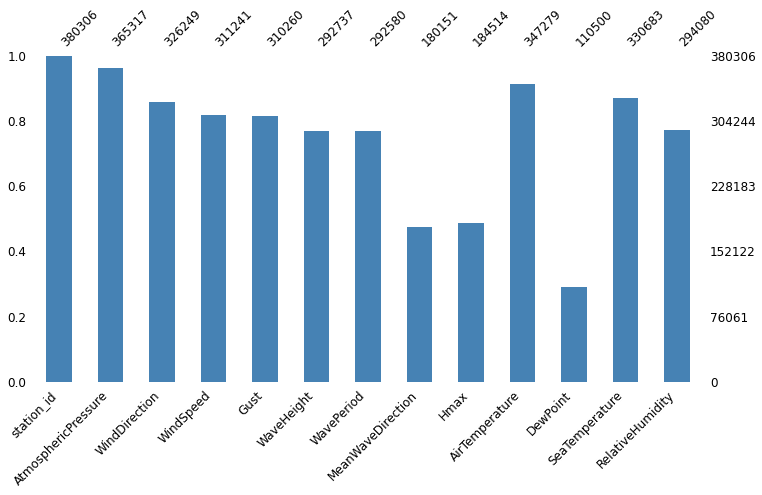

In [12]:
# Visualize the missing data
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()

In [13]:
# Calculate and display missing data percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
print(missing_value_df)

                             column_name  percent_missing
station_id                    station_id         0.000000
AtmosphericPressure  AtmosphericPressure         3.941300
WindDirection              WindDirection        14.214080
WindSpeed                      WindSpeed        18.160376
Gust                                Gust        18.418326
WaveHeight                    WaveHeight        23.025932
WavePeriod                    WavePeriod        23.067214
MeanWaveDirection      MeanWaveDirection        52.629987
Hmax                                Hmax        51.482753
AirTemperature            AirTemperature         8.684323
DewPoint                        DewPoint        70.944450
SeaTemperature            SeaTemperature        13.048177
RelativeHumidity        RelativeHumidity        22.672795


In [14]:
# Drop the rows which have missing Atmospheric Pressure value as missing data for Atmospheric Pressure is less than 5 per cent
df.dropna(subset=["DewPoint","RelativeHumidity"],inplace = True) 

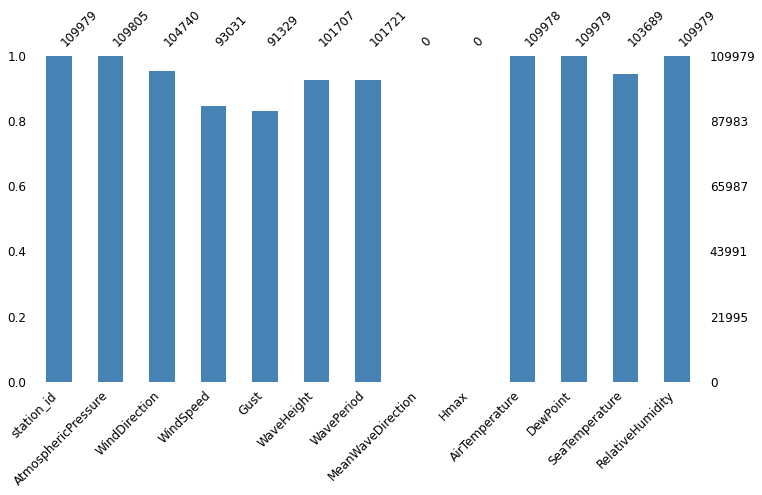

       station_id  AtmosphericPressure  WindDirection  WindSpeed  Gust  \
0              M6               1015.8           20.0       18.0  33.0   
1              M5               1006.2            NaN        NaN   NaN   
2              M4               1011.2           10.0       12.0  20.0   
3              M3               1009.4           30.0       17.0  25.0   
4              M3               1009.0           20.0       18.0  25.0   
...           ...                  ...            ...        ...   ...   
323995         M6               1018.1          340.0        2.0   4.0   
323999         M6               1017.7          300.0        2.0   4.0   
324003         M6               1017.9          130.0        4.0  12.0   
324007         M6               1017.3           80.0        3.0   8.0   
324011         M6               1016.7          130.0       10.0  14.0   

        WaveHeight  WavePeriod  MeanWaveDirection  Hmax  AirTemperature  \
0              4.5         8.0      

In [15]:
# Visualize the missing data again
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')
plt.show()
print(df)

In [16]:
# Drop the columns which are not required or which have missing data more than 50 per cent
df.drop(columns=["MeanWaveDirection","Hmax"],inplace = True)

In [17]:
#  Filter the data only for 5 buouys
buoy_ident = { 'M2':1 , 'M3': 2, 'M4':3, 'M5': 4, 'M6': 5}
df = df.loc[df.station_id.isin(buoy_ident.keys()) ]
temp = df.to_numpy()

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp[:,:-1],temp[:,-1], test_size=0.2, random_state=0)

In [19]:
# Convert test and train numpy arrays to dataframes
df_train = pd.DataFrame(np.hstack((X_train,y_train[:, None])))
df_test = pd.DataFrame(np.hstack((X_test,y_test[:, None])))
print(df_train.shape)
print(df_test.shape)

(87983, 11)
(21996, 11)


In [20]:
# Add headers to test and train dataframes
df_train=pd.DataFrame(df_train.values, columns = ['station_id','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','DewPoint','SeaTemperature','RelativeHumidity'])
print(df_train.shape)
df_test=pd.DataFrame(df_test.values, columns = ['station_id','AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','DewPoint','SeaTemperature','RelativeHumidity'])
print(df_test.shape)

(87983, 11)
(21996, 11)


In [21]:
train_copy=df_train.copy()
test_copy=df_test.copy()
# train_copy.drop(columns=["station_id"],inplace = True)
# test_copy.drop(columns=["station_id"],inplace = True)
train_copy.drop(columns=["station_id",'RelativeHumidity' ],inplace = True)
test_copy.drop(columns=["station_id",'RelativeHumidity'],inplace = True)
print(train_copy.shape)

(87983, 9)


In [22]:
train_trans, test_trans = impute_iterartive_imputer(train_copy, test_copy)
print(train_trans)

/Users/aishwaryaagarwal/opt/anaconda3/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


[[1011.4         270.           18.         ...   16.2
    13.9          16.1       ]
 [1023.3         190.           11.         ...   13.9
    11.           14.9       ]
 [1033.2         200.           19.         ...    7.7
     4.           10.2       ]
 ...
 [1011.2         250.           19.         ...   11.9
    10.7          11.3       ]
 [ 995.          150.           22.79627529 ...   10.6
     6.7          11.2       ]
 [1000.2         240.           26.         ...    8.
     4.1           9.9       ]]


In [23]:
# train_trans, test_trans = impute_mean_imputer(train_copy, test_copy)
# print(train_trans)

In [24]:
# Copy the imputed train data in data frames and save in csv file
df_train_new = pd.DataFrame(train_trans, columns = ['AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','DewPoint','SeaTemperature'])
df_train_final=pd.DataFrame()
df_train_final['station_id'] = df_train['station_id'].values
df_train_final = df_train_final.join(df_train_new)
rh = df_train['RelativeHumidity']
df_train_final = df_train_final.join(rh)
print(df_train_final)
df_train_final.to_csv(r'ProcessedWeatherData.csv_v5', index = False, header=True)

      station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0             M3               1011.4          270.0  18.000000  25.000000   
1             M6               1023.3          190.0  11.000000  14.000000   
2             M4               1033.2          200.0  19.000000  23.000000   
3             M6               1012.5          300.0  13.000000  20.000000   
4             M6               1011.0          190.0  13.000000  18.000000   
...          ...                  ...            ...        ...        ...   
87978         M5               1017.6          220.0  19.000000  25.000000   
87979         M5               1030.6          100.0   7.000000  12.000000   
87980         M6               1011.2          250.0  19.000000  31.000000   
87981         M6                995.0          150.0  22.796275  33.240814   
87982         M5               1000.2          240.0  26.000000  35.000000   

       WaveHeight  WavePeriod  AirTemperature  DewPoint  SeaTem

In [25]:
# Copy the imputed test data in data frames and save in csv file
df_test_new = pd.DataFrame(test_trans, columns = ['AtmosphericPressure','WindDirection','WindSpeed','Gust','WaveHeight','WavePeriod','AirTemperature','DewPoint','SeaTemperature'])
df_test_final=pd.DataFrame()
df_test_final['station_id'] = df_test['station_id'].values
df_test_final = df_test_final.join(df_test_new)
rh_test = df_test['RelativeHumidity']
df_test_final = df_test_final.join(rh_test)
print(df_test_final)
df_test_final.to_csv(r'ProcessedWeatherDataTest_v5.csv', index = False, header=True)

      station_id  AtmosphericPressure  WindDirection  WindSpeed       Gust  \
0             M6               1019.6     250.000000  17.331821  25.190067   
1             M6               1001.3     320.000000  25.000000  35.000000   
2             M6               1019.2     150.000000  19.127747  26.843626   
3             M2               1024.0      10.000000  16.000000  21.000000   
4             M4               1005.6     290.000000  19.000000  25.000000   
...          ...                  ...            ...        ...        ...   
21991         M6               1018.3     200.000000   3.000000   8.000000   
21992         M6               1010.0     140.000000  21.000000  31.000000   
21993         M4                992.2     173.622593   6.334971  12.038048   
21994         M5               1021.4     130.000000   9.000000  14.000000   
21995         M6               1015.7      20.000000  15.000000  25.000000   

       WaveHeight  WavePeriod  AirTemperature  DewPoint  SeaTem

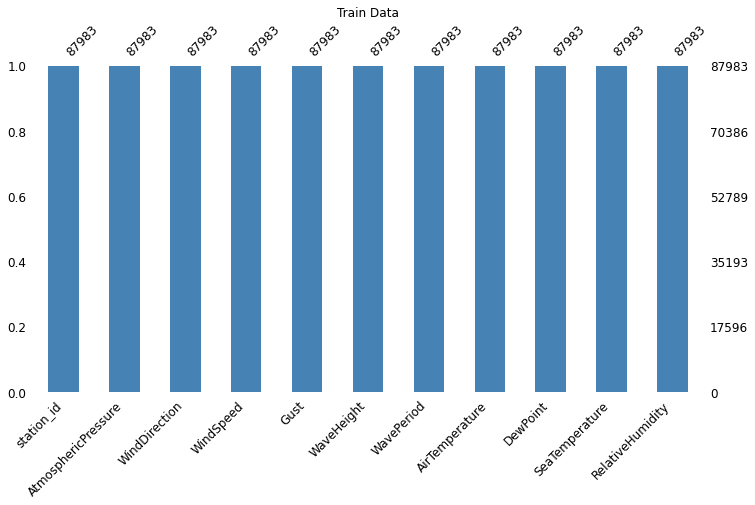

In [26]:
# after Imputation again visualize the missing train data
msno.bar(df_train_final,figsize=(12, 6), fontsize=12, color='steelblue')
plt.title('Train Data')
plt.show()

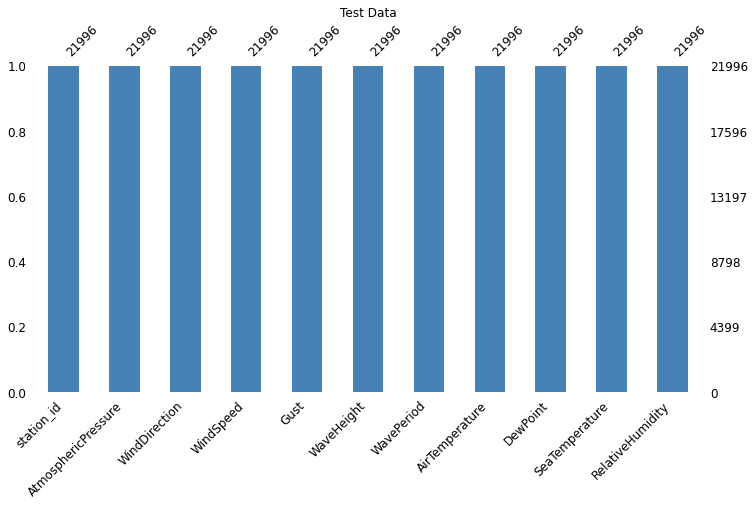

In [27]:
# after Imputation again visualize the missing test data
msno.bar(df_test_final,figsize=(12, 6), fontsize=12, color='steelblue')
plt.title('Test Data')
plt.show()